In [1]:
import tensorflow as tf

In [2]:
!wget -q -O lemon.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1JSgQ9qgi9nO9t2aGEk-zA6lzYNUT9vZJ"
!wget -q -O viaduct.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1sQzMKmyCR5Tur19lP3n1IIlEMG_o6Mct"
!wget -q -O water_tower.jpg --no-check-certificate "https://docs.google.com/uc?export=download&id=1cPAQD1O6mAiMbg0fmG5HIk8OuO_BSC6J"

In [3]:
!wget -O labels.txt --quiet https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt

# read the categories text file
with open('labels.txt', 'r') as txt_file:
    categories = txt_file.read().splitlines()
    
# number of labels
num_class = len(categories)
print(num_class)

1001


In [8]:
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential

In [5]:
!pip install tensorflow_hub

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 107 kB 224 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [7]:
!/usr/bin/python3 -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.5 MB 381 kB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4


In [12]:
module_url = 'https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4'

model = Sequential([
    hub.KerasLayer(module_url)
])

model.build(input_shape = [None, 160, 160, 3])

In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

lemon_img = load_img("lemon.jpg", target_size=(160, 160))
viaduct_img = load_img("viaduct.jpg", target_size=(160, 160))
water_tower_img = load_img("water_tower.jpg", target_size=(160, 160))

img_arr = img_to_array(water_tower_img)

img_arr = img_arr / 255.

img_arr = img_arr[np.newaxis, ...]

predictions = model.predict(img_arr)

# get top 5 positions
k = 5
sort = np.argsort(-predictions[0])
top_k = sort[:k]

# display top 5
for i in top_k:
    print('{} = {}'.format(categories[i], predictions[0][i]))

solar dish = 9.20384407043457
water tower = 9.0394287109375
aircraft carrier = 8.5388822555542
jigsaw puzzle = 8.328414916992188
oxygen mask = 8.181907653808594


In [14]:
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...] / 255.0
    preds = model.predict(x)
    top_preds = pd.DataFrame(columns=['prediction'],
                             index=np.arange(5)+1)
    sorted_index = np.argsort(-preds[0])
    for i in range(5):
        ith_pred = categories[sorted_index[i]]
        top_preds.loc[i+1, 'prediction'] = ith_pred
            
    return top_preds

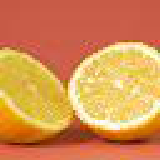

,prediction
1,shower cap
2,tray
3,candle
4,brassiere
5,African chameleon


In [15]:
# top 5 predictions for lemon image
display(lemon_img)
get_top_5_predictions(lemon_img)

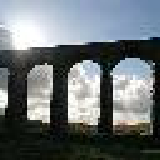

,prediction
1,viaduct
2,pier
3,dam
4,prison
5,solar dish


In [16]:
# top 5 predictions for viaduct image
display(viaduct_img)
get_top_5_predictions(viaduct_img)

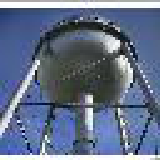

,prediction
1,solar dish
2,water tower
3,aircraft carrier
4,jigsaw puzzle
5,oxygen mask


In [17]:
# top 5 predictions for water tower image
display(water_tower_img)
get_top_5_predictions(water_tower_img)

binoculars  = 11.306281
espresso maker  = 10.354931
stretcher  = 9.351653
joystick  = 8.9307375
power drill  = 8.303423


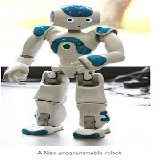

In [20]:
# load your own image

filepath = 'robot.jpeg'# path to your image file, example - 'image/lion.jpg'
my_image = load_img(filepath, target_size=(160, 160))
img_arr = img_to_array(my_image)

# normalize
img_arr = img_arr / 255.0

# expand_dimensions
img_arr = img_arr[np.newaxis, ...]

# predict
predictions = model.predict(img_arr)

# get top 5 positions
k = 5
sort = np.argsort(-predictions[0])
top_k = sort[:k]

# display top 5
for i in top_k:
    print(categories[i],' =' ,predictions[0][i])

display(my_image)

In [18]:
module = hub.load(module_url)

predictions = module(img_arr)[0]

top_k_pred_values, top_k_indices = tf.math.top_k(predictions, k=5)
top_k_pred_values = top_k_pred_values.numpy()
top_k_indices = top_k_indices.numpy()

# Display top 5 predictions

for probability, index in zip(top_k_pred_values, top_k_indices):
    print( categories[index], probability)

solar dish 9.203844
water tower 9.039429
aircraft carrier 8.538882
jigsaw puzzle 8.328415
oxygen mask 8.181908
